# 04 -- Digits MNIST - Keras

## Victor Jose Novaes Pires

### 2019-03-08

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.2


In [6]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0


## MNIST dataset

In [7]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Feature scaling

In [8]:
import numpy as np

X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [9]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [10]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

### Categorization

In [11]:
classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
from keras.utils import to_categorical

y_train_c = to_categorical(y_train, len(classes))

y_train_c.shape

(60000, 10)

In [13]:
y_train_c[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
y_test_c = to_categorical(y_test, len(classes))

y_test_c.shape

(10000, 10)

### Dataset analysis and equations on: 01 -- Digits MNIST - NumPy

## Stochastic Gradient Descent

In [15]:
from keras.models import Sequential

from keras.layers import Flatten, Dense, Dropout

model = Sequential()

model.add(Flatten())

model.add(Dense(25, activation='sigmoid', input_shape=(784,)))

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [16]:
%%time

model.fit(X_train, y_train_c, epochs=3)

print()

Epoch 1/3
60000/60000 [==============================] - 7s 114us/step - loss: 0.0937 - acc: 0.1129
Epoch 2/3
60000/60000 [==============================] - 7s 113us/step - loss: 0.0911 - acc: 0.1382
Epoch 3/3
60000/60000 [==============================] - 7s 115us/step - loss: 0.0896 - acc: 0.1622

CPU times: user 23.1 s, sys: 25.6 s, total: 48.7 s
Wall time: 20.7 s


### Scores

In [17]:
import NNfromScratch as nnfs

p_train = np.argmax(model.predict(X_train), axis=1)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 22.88%


In [18]:
p_test = np.argmax(model.predict(X_test), axis=1)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 23.23%


# Hyperparameter optimization

## Activations:

### Sigmoid, Scaled Exponential Linear Unit and Rectified Linear Unit

## Dropout

## Optimizers

### Stochastic Gradient Descent and Adam

## Losses

### Mean Squared Error, Categorical Crossentropy and Sparse Categorical Crossentropy

In [19]:
%%time

losses = ['mean_squared_error', 'categorical_crossentropy', 'sparse_categorical_crossentropy']

best = {'Accuracy': 0, 'Activation': None, 'Dropout': None, 'Optimizer': None, 'Loss function': None}

for activation in ['sigmoid', 'selu', 'relu']:
    for dropout in [0.0, 0.1, 0.2]:
        for optimizer in ['sgd', 'adam']:
            for loss in losses:
                print(f"Activation: {activation}\n"
                      f"Dropout: {dropout}\n"
                      f"Optimizer: {optimizer}\n"
                      f"Loss function: {loss}")

                model = Sequential([Flatten(),
                                    Dense(25, activation=activation, input_shape=[784, None]),
                                    Dropout(dropout),
                                    Dense(10, activation='softmax')])

                model.compile(optimizer=optimizer,
                              loss=loss,
                              metrics=['accuracy'])

                if loss == 'sparse_categorical_crossentropy':
                    model.fit(X_train, y_train, epochs=3, verbose=0)
                    loss_train, train_acc = model.evaluate(X_train, y_train, verbose=0)
                    loss_test, test_acc = model.evaluate(X_test, y_test, verbose=0)
                else:
                    model.fit(X_train, y_train_c, epochs=3, verbose=0)
                    loss_train, train_acc = model.evaluate(X_train, y_train_c, verbose=0)
                    loss_test, test_acc = model.evaluate(X_test, y_test_c, verbose=0)

                print(f"Train loss: {loss_train:.5f}\tTrain accuracy: {train_acc*100:.2f}%\n"
                      f"Test loss:  {loss_test:.5f}\tTest accuracy:  {test_acc*100:.2f}%")
                print('-'*50)

                if test_acc > best['Accuracy']:
                    best['Accuracy'] = test_acc
                    best['Activation'] = activation
                    best['Dropout'] = dropout
                    best['Optimizer'] = optimizer
                    best['Loss function'] = loss

print()

Activation: sigmoid
Dropout: 0.0
Optimizer: sgd
Loss function: mean_squared_error
Train loss: 0.08712	Train accuracy: 30.16%
Test loss:  0.08718	Test accuracy:  30.76%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: sgd
Loss function: categorical_crossentropy
Train loss: 0.63033	Train accuracy: 84.81%
Test loss:  0.61170	Test accuracy:  85.88%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: sgd
Loss function: sparse_categorical_crossentropy
Train loss: 0.60628	Train accuracy: 86.83%
Test loss:  0.59326	Test accuracy:  87.28%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: adam
Loss function: mean_squared_error
Train loss: 0.00880	Train accuracy: 94.66%
Test loss:  0.00925	Test accuracy:  94.10%
--------------------------------------------------
Activation: sigmoid
Dropout: 0.0
Optimizer: adam
Loss function: categorical_crossentropy
Train loss: 0.2

Train loss: 0.29591	Train accuracy: 91.61%
Test loss:  0.28649	Test accuracy:  92.01%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: sgd
Loss function: sparse_categorical_crossentropy
Train loss: 0.28216	Train accuracy: 92.07%
Test loss:  0.27213	Test accuracy:  92.14%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: adam
Loss function: mean_squared_error
Train loss: 0.00708	Train accuracy: 95.58%
Test loss:  0.00794	Test accuracy:  94.78%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: adam
Loss function: categorical_crossentropy
Train loss: 0.14524	Train accuracy: 95.80%
Test loss:  0.16057	Test accuracy:  95.17%
--------------------------------------------------
Activation: relu
Dropout: 0.0
Optimizer: adam
Loss function: sparse_categorical_crossentropy
Train loss: 0.15524	Train accuracy: 95.62%
Test loss:  0.17387	Test accuracy:  94.97%
---------------

## Best model

In [20]:
print(">>> Best model:")
for k in best.keys():
    print(f">> {k}: {best[k]}")

>>> Best model:
>> Accuracy: 0.9565
>> Activation: selu
>> Dropout: 0.0
>> Optimizer: adam
>> Loss function: sparse_categorical_crossentropy


In [21]:
model = Sequential([Flatten(),
                    Dense(25, activation=best['Activation'], input_shape=[784, None]),
                    Dropout(best['Dropout']),
                    Dense(10, activation='softmax')])

model.compile(optimizer=best['Optimizer'],
              loss=best['Loss function'],
              metrics=['accuracy'])

In [22]:
%%time

if best['Loss function'] == 'sparse_categorical_crossentropy':
    model.fit(X_train, y_train, epochs=10)
else:
    model.fit(X_train, y_train_c, epochs=10)

print()

Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.3772 - acc: 0.8940
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2210 - acc: 0.9369
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1817 - acc: 0.9464
Epoch 4/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.1578 - acc: 0.9530
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1404 - acc: 0.9582
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1270 - acc: 0.9616
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.1173 - acc: 0.9642
Epoch 8/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1092 - acc: 0.9663
Epoch 9/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1029 - acc: 0.9681
Epoch 10/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0970 - 

## Scores

### Training set

In [23]:
p_train = np.argmax(model.predict(X_train), axis=1)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 97.27%


In [24]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 58,359 out of 60,000 images.


In [25]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 1,641 out of 60,000 images.


### Test set

In [26]:
p_test = np.argmax(model.predict(X_test), axis=1)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 96.20%


In [27]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 9,620 out of 10,000 images.


In [28]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 380 out of 10,000 images.


## Correctly classified images

In [29]:
import matplotlib.pyplot as plt

def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {y[indices[i]]} <> Pred: {p[indices[i]]}", fontsize=12)
        ax.set_axis_off()

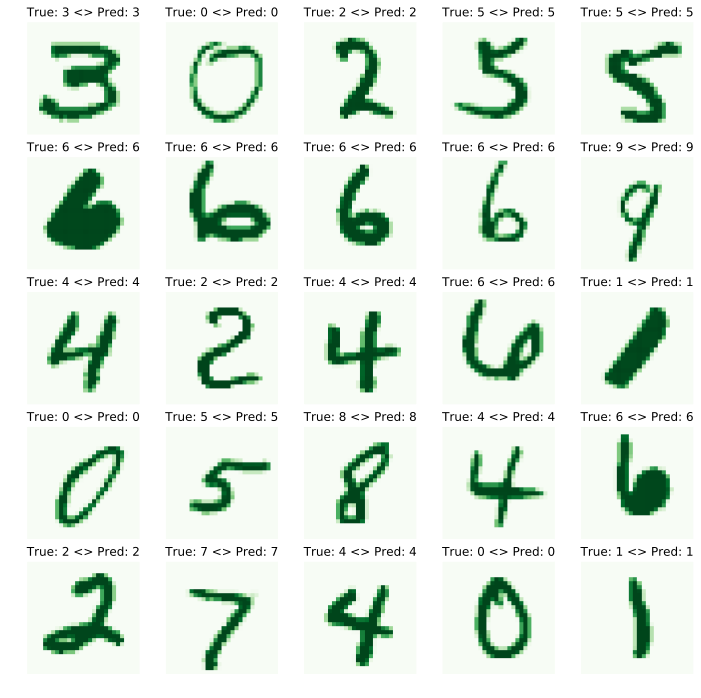

In [30]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

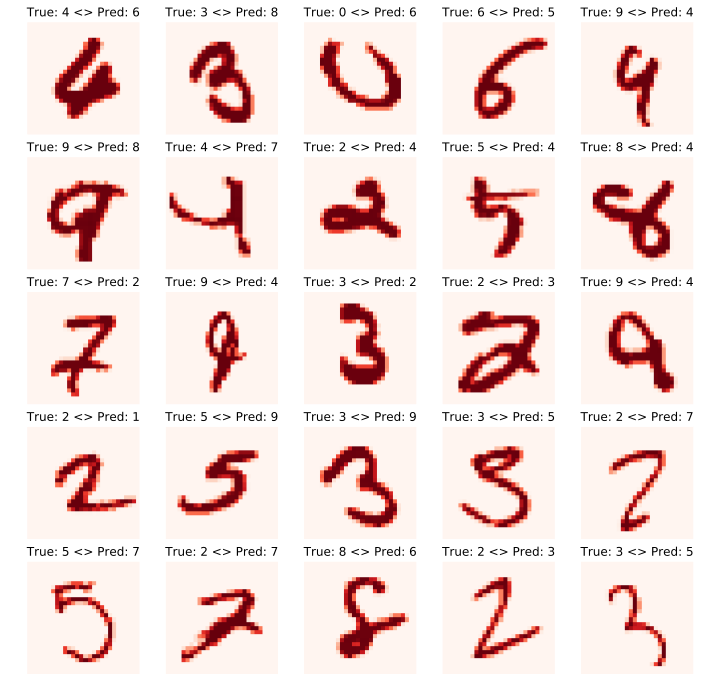

In [31]:
plot_images(X_test,
            y_test,
            p_test,
            5,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')